In [1]:
%load_ext kedro

[10/06/25 15:13:44] INFO     Using                                                                  ]8;id=934209;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=234593;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-                
                             packages/kedro/framework/project/rich_logging.yml' as logging                         
                             configuration.                                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=787955;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=462713;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=258742;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=884827;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=895724;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=90690;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /home/zishan/Documents/projects/car-price-prediction.                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/06/25 15:13:45] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=489253;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=584657;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/06/25 15:13:46] INFO     Kedro project car_price_prediction                                     ]8;id=51766;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=968215;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=189117;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=23603;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

In [2]:
df = catalog.load('feature_data')
df.info()

[10/06/25 15:13:53] INFO     Loading data from feature_data (ParquetDataset)...                ]8;id=404871;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=104512;file:///home/zishan/anaconda3/envs/car_price_prediction/lib/python3.13/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 41 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   num__model_year                               188533 non-null  float64
 1   num__milage                                   188533 non-null  float64
 2   num__accident                                 188533 non-null  float64
 3   num__clean_title                              188533 non-null  float64
 4   num__price                                    188533 non-null  float64
 5   num__premium_score                            188533 non-null  float64
 6   num__eng_cylinders                            188533 non-null  float64
 7   num__eng_volume                               188533 non-null  float64
 8   num__eng_hp                                   188533 non-null  float64
 9   num__trans_mordernity                         18

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, mutual_info_regression, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso, ElasticNet

In [24]:
X = df.drop('num__price', axis=1)
y = df['num__price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
var_thresh = VarianceThreshold(threshold=0.001)
var_thresh.fit(df)

print(*df.columns[~var_thresh.get_support()], sep='\n')

cat__fuel_type_Plug-In Hybrid
cat__fuel_type_not supported
cat__trans_tech_Dual_Clutch
cat__trans_tech_Electric_Single_Speed


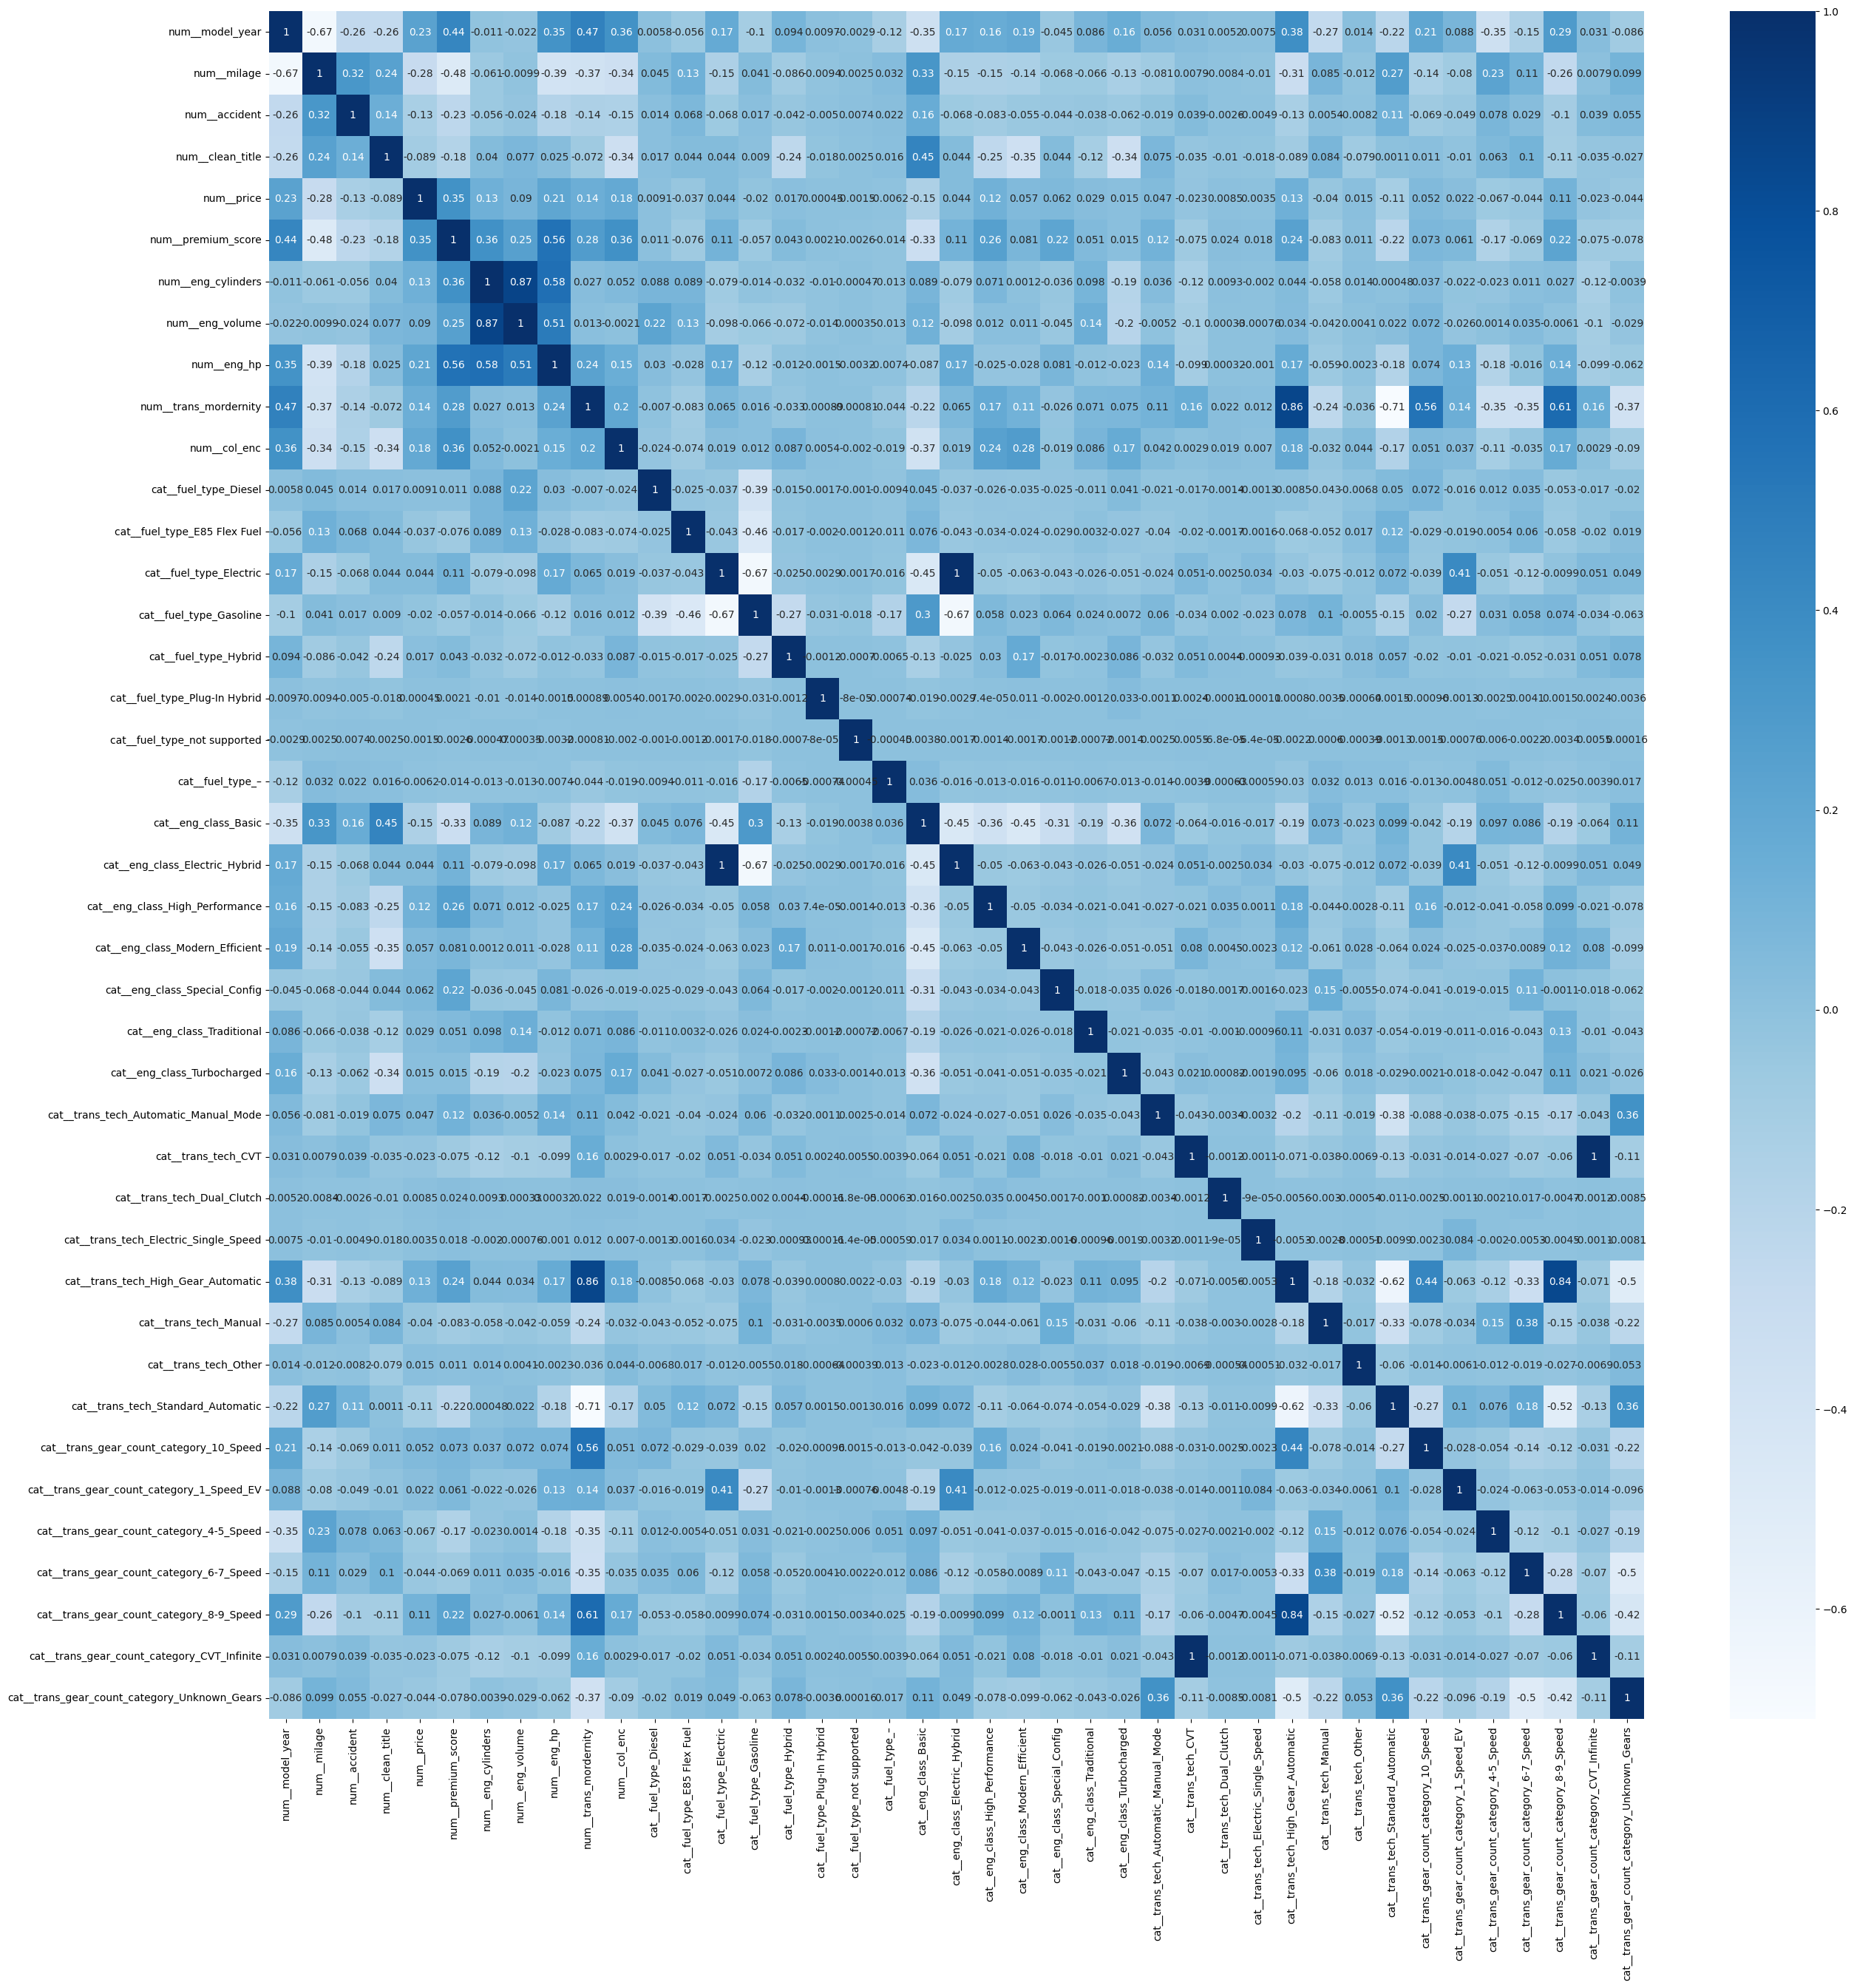

In [26]:
cor = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [27]:
def correlation(df: pd.DataFrame, thres: int) -> list:
    cor_cols = set()
    cor_mat = df.corr()
    num_cols = len(cor_mat.columns)
    for i in range(num_cols):
        for j in range(i):
            if cor_mat.iloc[i, j] > thres:
                cor_cols.add((df.columns[i], df.columns[j]))
    return list(cor_cols)

In [20]:
correlated_columns = correlation(df[num_cols], 0.85)
for col in correlated_columns:
    print(col)
    

('cat__trans_gear_count_category_CVT_Infinite', 'cat__trans_tech_CVT')
('cat__trans_tech_High_Gear_Automatic', 'num__trans_mordernity')
('num__eng_volume', 'num__eng_cylinders')
('cat__eng_class_Electric_Hybrid', 'cat__fuel_type_Electric')


In [35]:
mutual_info = pd.Series(mutual_info_regression(X_train, y_train))
mutual_info.index = X_train.columns
mutual_info.nlargest(10)


num__milage                            0.643909
num__model_year                        0.540669
num__eng_hp                            0.534874
num__premium_score                     0.421247
num__col_enc                           0.224792
num__eng_volume                        0.164283
num__clean_title                       0.162786
num__trans_mordernity                  0.153848
cat__eng_class_Basic                   0.153649
cat__trans_tech_High_Gear_Automatic    0.098318
dtype: float64

<Axes: >

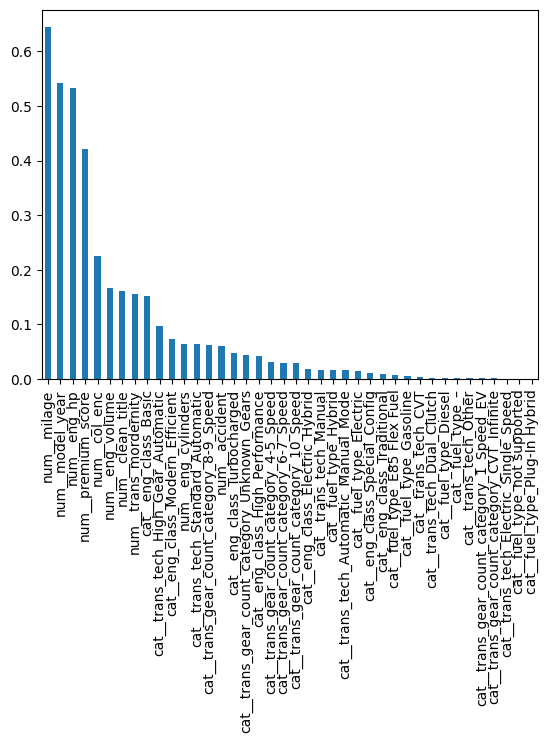

In [31]:
mutual_info.sort_values(ascending=False).plot.bar()

In [40]:
sel_5_best = SelectKBest(mutual_info_regression, k=10)
sel_5_best.fit(X_train, y_train)
print(*X_train.columns[sel_5_best.get_support()], sep='\n')

num__model_year
num__milage
num__clean_title
num__premium_score
num__eng_volume
num__eng_hp
num__trans_mordernity
num__col_enc
cat__eng_class_Basic
cat__trans_tech_High_Gear_Automatic


In [42]:
sel_5_best = SelectKBest(mutual_info_regression, k=20)
sel_5_best.fit(X_train, y_train)
print(*X_train.columns[sel_5_best.get_support()], sep='\n')

num__model_year
num__milage
num__accident
num__clean_title
num__premium_score
num__eng_cylinders
num__eng_volume
num__eng_hp
num__trans_mordernity
num__col_enc
cat__eng_class_Basic
cat__eng_class_High_Performance
cat__eng_class_Modern_Efficient
cat__eng_class_Turbocharged
cat__trans_tech_High_Gear_Automatic
cat__trans_tech_Standard_Automatic
cat__trans_gear_count_category_10_Speed
cat__trans_gear_count_category_4-5_Speed
cat__trans_gear_count_category_8-9_Speed
cat__trans_gear_count_category_Unknown_Gears


In [52]:
lasso = Lasso(alpha=0.0005)
lasso.fit(X_train, y_train)

,alpha,0.0005
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [53]:
lasso.coef_


array([ 0.0191874 , -0.13924714, -0.01296128,  0.01214166,  0.25877817,
        0.03970843,  0.00039135, -0.02849507,  0.        ,  0.0393478 ,
        0.0660991 ,  0.        , -0.        , -0.00102167, -0.02307532,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.06950233,  0.00834217,  0.        , -0.        , -0.00721884,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.00357257,  0.02082174, -0.01678291,  0.        , -0.        ,
        0.06301987, -0.00908227, -0.        , -0.        ,  0.        ])

In [56]:
lasso_top_20_coef = pd.Series(lasso.coef_, index=lasso.feature_names_in_).abs().nlargest(20)
lasso_top_20_coef


num__premium_score                          0.258778
num__milage                                 0.139247
cat__eng_class_High_Performance             0.069502
cat__fuel_type_Diesel                       0.066099
cat__trans_gear_count_category_4-5_Speed    0.063020
num__eng_cylinders                          0.039708
num__col_enc                                0.039348
num__eng_hp                                 0.028495
cat__fuel_type_Hybrid                       0.023075
cat__trans_tech_Other                       0.020822
num__model_year                             0.019187
cat__trans_tech_Standard_Automatic          0.016783
num__accident                               0.012961
num__clean_title                            0.012142
cat__trans_gear_count_category_6-7_Speed    0.009082
cat__eng_class_Modern_Efficient             0.008342
cat__eng_class_Turbocharged                 0.007219
cat__trans_tech_Manual                      0.003573
cat__fuel_type_Gasoline                     0

In [59]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)

,alpha,0.001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [60]:
ridge_top_20_coef = pd.Series(ridge.coef_, index=ridge.feature_names_in_).abs().nlargest(20)
ridge_top_20_coef


num__premium_score                           0.257314
cat__trans_tech_Electric_Single_Speed        0.248909
cat__trans_tech_Other                        0.190164
num__milage                                  0.140076
cat__fuel_type_Diesel                        0.104753
cat__fuel_type_–                             0.098003
cat__trans_gear_count_category_4-5_Speed     0.086127
cat__fuel_type_not supported                 0.084909
cat__trans_tech_Dual_Clutch                  0.081013
cat__fuel_type_Plug-In Hybrid                0.078277
cat__eng_class_High_Performance              0.071181
cat__fuel_type_Hybrid                        0.070894
cat__trans_gear_count_category_1_Speed_EV    0.050033
num__eng_cylinders                           0.042340
num__col_enc                                 0.039214
cat__eng_class_Traditional                   0.034266
cat__eng_class_Turbocharged                  0.032160
num__eng_hp                                  0.028837
cat__fuel_type_E85 Flex Fue

In [62]:
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

,alpha,0.001
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [63]:
elastic_net_top_20_coef = pd.Series(elastic_net.coef_, index=elastic_net.feature_names_in_).abs().nlargest(20)
elastic_net_top_20_coef


num__premium_score                          0.258623
num__milage                                 0.139132
cat__eng_class_High_Performance             0.068549
cat__fuel_type_Diesel                       0.064083
cat__trans_gear_count_category_4-5_Speed    0.062176
num__eng_cylinders                          0.039597
num__col_enc                                0.039413
num__eng_hp                                 0.028450
cat__fuel_type_Hybrid                       0.021994
num__model_year                             0.019223
cat__trans_tech_Other                       0.017771
cat__trans_tech_Standard_Automatic          0.016871
num__accident                               0.012983
num__clean_title                            0.012052
cat__trans_gear_count_category_6-7_Speed    0.009107
cat__eng_class_Modern_Efficient             0.007968
cat__eng_class_Turbocharged                 0.007264
cat__trans_tech_Manual                      0.003560
cat__fuel_type_Gasoline                     0